# **Bioinformatique micro-projet**
# Manipulation de données de génétique humaine

## Version pour les étudiants

<div class="alert alert-block alert-info"> 
   
<em>   <b>Commencez par faire une copie de ce notebook, par sécurité (en faisant un clic droit + Duplicate). </b><br>
Rappel : Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
</em>
</div>

<mark>Si vous ajoutez des cellules avec vos commentaires, ou que vous modifiez des cellules existantes, **n'oubliez pas d'enregistrer votre notebook**.<mark>

<div class="alert alert-warning">➡️ <b>Votre travail qui sera évalué </b><br><ul>
   <li> Les boîtes oranges contiennent des instructions que vous allez devoir traduire en commandes BASH.
    Une partie de la commande peut vous être donnée, à vous de la completer en remplacant les <b>[XXX]</b>.</li>
    <br/>
   <li> L'évaluation consistera en un simple questionnaire numéroté sur MOODLE (à ce <a href="https://moodle.u-paris.fr/mod/quiz/view.php?id=471474">lien</a>) dans lequel vous devrez reporter ce par quoi vous avez remplacé ces <b>[XXX]</b> ou bien le résultat de certaines commandes. Il y a 17 questions. La note sera ramenée à 20 points. </li>
</div>

## I. Description et explorations préliminaires
---

### I.A. Les données
Vous allez travailler avec des données issues du projet ['1000 genomes'](https://www.internationalgenome.org/home) qui vise à cartographier et quantifier la diversité génétique d' _Homo sapiens_ et de ses sous-populations.

Les variants présents dans ce projet sont ceux qui atteignent au moins 1% en fréquence dans la population.

### I.B. Fichiers

Vous allez travailler avec un fichier au format **.VCF** *(pour Variant Call Format)*. Il s'agit d'un format de fichier typique issu d'une analyse de Whole Genome Sequencing (WGS) ou de Whole Exome Sequencing (WES). L'explication détaillée de la structure du format de ce fichier est détaillée à ce lien: http://samtools.github.io/hts-specs/VCFv4.3.pdf. Un fichier .VCF est généralement accompagné d'un fichier d'index **.TBI** (*TAB-delimited genome position idex file*) strucrant les élements du fichier .VCF dans un ordrer stucturé par rapport à leur position génomique  afin de les retrouver rapidement.

Nous allons explorer les fichiers du chromosome 17, dans leur version compressée:

- `chr17.vcf.gz`: le fichier .VCF du chromosome 17 
- `chr17.vcf.gz.tbi` : le fichier .TBI associé 

### I.C. Structure du projet

Lorsque l'on démarre un projet, nous vous conseillons de structurer votre répertoire pour ce projet avec un sous-repertoire contenant les données et un sous-repertoire contenant les résultats. Pour ce projet, vous allez devoir créer un dossier dédié avec la structure suivante :
<pre>
micro_projet_bi/   
    ├── data/   
    └── output/   
</pre>

<div class="alert alert-warning"> 
  <b>Q1 )</b> Créez la structure des répertoires du projet.  Indiquez sur moodle à quoi correspond  XXX XXX. Et exécutez la commande.
</div>

In [ ]:
# cell 1
cd ~/pass_minrs_ue3/
mkdir micro_projet_bi/
cd micro_projet_bi
mkdir XXX XXX

### I.D. Téléchargement des données

Vous allez maintenant télécharger les données depuis le serveur du projet _1000 genome_ et les stocker dans le répertoire data. On utilise la commande **wget**.

<div class="alert alert-block alert-danger">
    ⏳ <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (2-5 minutes). Patience patience ... Tant qu'il y a une étoile à gauche, la commande n'est pas finie.
</div>

In [ ]:
# cell 2
wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000_genomes_project/release/20190312_biallelic_SNV_and_INDEL/ALL.chr17.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf.gz -O ./data/chr17.vcf.gz

wget ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000_genomes_project/release/20190312_biallelic_SNV_and_INDEL/ALL.chr17.shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf.gz.tbi -O ./data/chr17.vcf.gz.tbi


Lorsque l'on télécharge des fichiers volumineux, **il est important de s'assurer de l'intégrité des données**, nous pouvons pour cela calculer ce qui s'apelle un _checksum_ qui est un genre d'empreinte numérique unique à chaque fichier. Voici la commande qui calcule le _md5sum_ de nos deux fichiers.

In [ ]:
# cell 3
md5sum ./data/chr17.vcf.gz
md5sum ./data/chr17.vcf.gz.tbi

Voici les valeurs que vous devriez trouver:
```
ecc22783fd1ee7a1c66b053491873192  ./data/chr17.vcf.gz
018b04025b351d8c78ecba48131cea22  ./data/chr17.vcf.gz.tbi

```
<div class="alert alert-block alert-danger">
⚠️ <b>Attention:</b> Si jamais vous trouvez des valeurs différentes, il faut alors télécharger les fichiers à nouveau.</div>

### I.E. Premières observations

Observons le début du fichier **.vcf** :

- **metadata** du fichier :

On commence par les lignes 1 à 19 :

In [ ]:
# cell 4
zcat ./data/chr17.vcf.gz | head -19

<div class="alert alert-block alert-danger">
🤔  <b>Attention :</b> L'affichage <code>gzip : sddout: Broken pipe</code> est juste dû au fait que nous travaillons sur des notebooks. Ne vous inquiétez pas, c'est normal. Il y en aura d'autres dans la suite du TP</div>

On observe les metadata qui nous donnent des renseignements sur le fichier. Ces données vont nous aider à comprendre le corps du fichier. Toutes les lignes de meta-informations commencent par un ***double dièze: ##***

- on regarde à présent l'**en-tête** du corps du fichier, à la 20ème ligne :

La 20 ème ligne, qui précède le corps du fichier, commence par un ***simple dièze #***. Elle nous indique ce que nous allons trouver dans les colonnes du fichier. A partir de la 10ème colonne, il s'agit des noms de code des différents individus dont les génotypes sont représentés par les symboles suivants: 0/0 0/1 1/0 1/1 selon leur degré d'homozygotie pour chacun des variants (seuls les 15 premiers ont été affichés ici, il y en a en tout environ 2500).

In [ ]:
# cell 5
zcat ./data/chr17.vcf.gz | head -n 20 | tail -n 1 | cut -f 1-15

- le **corps du fichier** à partir de la ligne 21:

Après cette 20ème ligne, les suivantes les suivantes présentent les données du fichiers. Elles ne sont précédées d'***aucun signe dieze***. Chaque ligne indique un variant, des informations le concernant et sa présence ou son absence chez les différents sujets de la cohorte _1000 genomes_.

<div class="alert alert-warning"> 
<b>Q2 )</b> Affichez les 50 premières colonnes de la ligne 200. Remplacez les XXX dans la commande et exécutez-la.
</div>

In [ ]:
# cell 6
zcat ./data/chr17.vcf.gz | head -n XXX | tail -n 1 | cut -f 1-XXX

<div class="alert alert-warning"> 
<b>Q3 )</b> Combien d'individus homozygotes pour l'allèle <code>A</code> recensez-vous à la position <code>147160</code> ?
</div>

La commande `wc` nous donne des renseignements sur le nombre de lignes, de mots et de charactères que contient un fichier. (l'argument `-l` permet de n'obtenir que le nombre de lignes.) On peut donc l'utiliser pour avoir une idée approximative du nombre de variants. *(Pourquoi approximative ? Vous avez peut être déjà une idée, nous allons de toute manière traiter cette question un peu plus tard.)*

<div class="alert alert-block alert-danger">
    ⏳ <b>Attention:</b> 
    La commande suivante peut prendre un peu de temps (environ 1 minute) de calcul. Patience patience ...
</div>

<div class="alert alert-warning"> 
<b>Q4 )</b> Placez à la fin de la ligne, à la place de XXX, la commande permettant d'obtenir le nombre de lignes (uniquement !) du fichier <code>vcf</code> du chromosome 17
</div>

In [ ]:
# cell 7
cat ./data/chr17.vcf.gz | gzip -d | XXX

<div class="alert alert-warning"> 
<b>Q5 )</b> Combien de lignes comporte le fichier <code>./data/chr17.vcf.gz</code> ?
</div>

### I. F. Analyses préliminaires

Nous allons maintenant extraire des informations de ce fichier. Pour commencer, nous allons compter les différents types de variants présents sur le chromosome 17.

<div class="alert alert-warning"> 
<b>Q6 )</b> La première commande que nous allons lancer nous permettra de lister les différents types de variants recensés dans le fichier étudié précédemment. Remplacez le XXX par le bon code.
</div>

In [ ]:
# cell 8
zcat XXX | tail +21 | head -100 | cut -f 8 | sed 's/.*VT=\([^;]*\).*/\1/' | sort | uniq

Voici maintenant comment compter le nombre de SNP présents sur le chromosome 17.

<div class="alert alert-block alert-danger">
   ⏳ <b>Attention:</b> 
    Les deux commandes suivantes peuvent prendre un peu de temps (environ 1 minute) de calcul. Patience patience ...
</div>

In [ ]:
# cell 9
zcat ./data/chr17.vcf.gz | grep -c "VT=SNP"

<div class="alert alert-warning"> 
<b>Q7 )</b> A votre tour de compter le nombre d'insertions/délétions présentes. Remplacez XXX par le bon code.
</div>

In [ ]:
# cell 10
zcat ./data/chr17.vcf.gz | grep -c "XXX"

<div class="alert alert-warning"> 
    <b>Q8 )</b>  Combien avez vous recensé d'INDEL ?
</div>

Si vous additionnez les deux valeurs obtenues précédemment, vous ne manquerez pas de constater que le résultat n'est pas le même que celui que vous avez obtenu en réponse à la question 5 ). Ceci est dû aux metadata du fichier et à l'en-tête, donc le nombre de lignes est compté par `wc -l` mais qui ne représente pas des variants.

Nous allons maintenant réutiliser la commande `grep -c` pour compter le nombre de lignes commencant par `#` 

In [ ]:
# cell 11
zcat ./data/chr17.vcf.gz | head -n 1000 | grep -c '^#'

<div class="alert alert-warning"> 
    <b>Q9 )</b> En additionnant ce dernier chiffre au nombre de <code>SNP</code> et <code>d'INDEL</code>, obtenons-nous le même qu'avec la commande <code>wc -l</code> ?
</div>

Pour vous aider, voici comment faire une addition en bash. Il vous suffit de remplacer les valeurs de a, b et c.

In [ ]:
# cell 12
a=1
b=10
c=100
resultat=$(($a+$b+$c))
echo $resultat

## II. Analyses spécifiques
---

### II.A. Données relatives à *BRCA1*

Le chromosome 17 est notamment porteur du gène _BRCA1_ donc wikipedia nous dit très justement:

> Le gène _BRCA1_ (abréviation de breast cancer 1) est un gène humain découvert en 1990 par Mary-Claire King, appartenant à une classe de gènes suppresseurs de tumeur, qui maintiennent l'intégrité génomique afin de prévenir la prolifération incontrôlée de cellules mammaires. [source](https://fr.wikipedia.org/wiki/BRCA1) (consulté le 28/03/2022)

Nous allons désormais nous concentrer sur les variations génétiques touchant la séquence de _BRCA1_.

La première chose à faire est donc de trouver la position de _BRCA1_ sur le chromosome 17 humain.

Rendez-vous sur la page consacrée au gène <i>BRCA1</i> du site du 
<a href="https://www.ncbi.nlm.nih.gov/gene/672">NCBI</a> (National Center for  Biotechnology Information)  dans sa base de données "Genes". La référence du génome humain que nous utilisons est nommée GRCh38.p14.

Nous allons maintenant utiliser un outil nommé **Bcftools** qui permet entre autre de manipuler très efficacement et rapidement des fichiers .VCF tel que celui sur lequel nous travaillons.

Notre but est maintenant d'obtenir un fichier filtré qui ne contiendra que les variants présents sur le gène _BRCA1_ et non pas de l'ensemble du chromosome 17.

<div class="alert alert-warning"> 
    <b>Q10 ) </b>Trouvez les bornes du gène <i>BRCA1</i> sur la page du NCBI et reportez les dans la commande suivante qui va effectuer le filtrage des positions d'intérêt.
</div>

In [ ]:
# ell 13
bcftools view \
    --regions "17:XXX-XXX" \
    -O z \
    --output-file ./output/brca1.vcf.gz \
    --threads 4 \
    ./data/chr17.vcf.gz

<div class="alert alert-warning"> 
    <b>Q11 ) </b>En utilisant la méthode de comptage de votre choix, déterminez le nombre de variants présent dans <i>BRCA1</i> au sein de la cohorte 1k genome.
</div>

In [ ]:
# cell 14
XXX

### II.B. Polymorphismes particuliers et cancers

Voici un tableau tiré de la publication suivante: 

***Identification of Variants (rs11571707, rs144848, and rs11571769) in the BRCA2 Gene Associated with Hereditary Breast Cancer in Indigenous Populations of the Brazilian Amazon***

Dobbin _et. al._, Genes 2021, 12(2), 142; https://doi.org/10.3390/genes12020142 

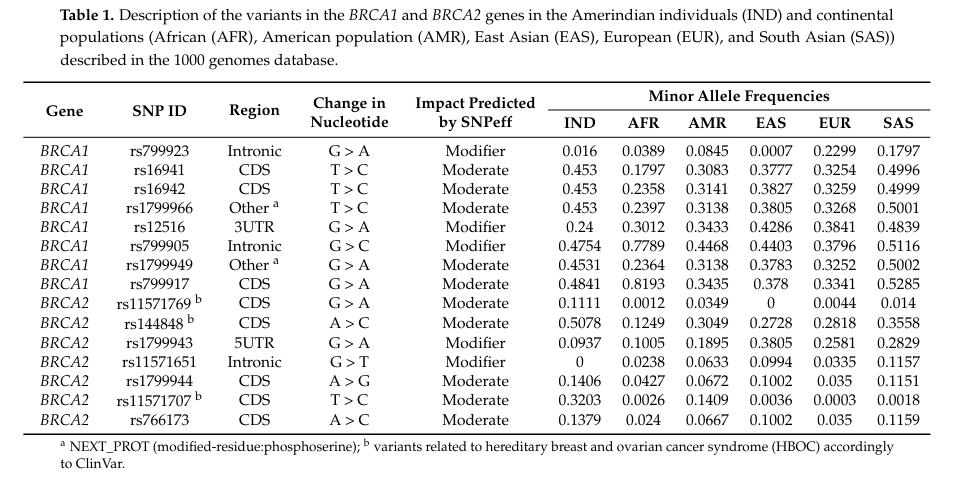 

Vous remarquerez que les SNP sont indiqué par un identifiant commençant par `rs` (pour _Reference SNP_) suivi de plusieurs chiffres selon la base de données de références **dbSNP**.
Cet identifiant unique est très pratique car il désigne un SNP de manière non ambigüe. C'est un identifiant qui sert de référence pour toutes les bases de données de variants. 


Notre fichier `vcf` n'est pas annoté et ne contient donc pas ce renseignement. Nous pouvons tout de même vérifier que ces SNP d'intérêt sont bien présents de la manière suivante (exemple de `rs12516`):

- Rendez-vous sur la section [dbSNP](https://www.ncbi.nlm.nih.gov/snp/) du site du NCBI et entrez dans la barre de recherche le SNP-ID commençant par `rs`
- Trouvez sa position sur la référence GRCh38, ici `17:43044391` soit Chromosome `17`, position `43044391`
- lancez la commande suivante pour trouver une ligne contenant cette position (nous ne conservons que les 30 première colonne avec `cut -f 1-30`pour ne pas polluer l'affichage)

In [ ]:
# cell 15
zcat ./output/brca1.vcf.gz | grep '43044391' | cut -f 1-30

Observez les fréquences de l'allèle mineur dans les différentes populations.

<div class="alert alert-warning"> 
    <b>Q12 )</b> Répétez exactement la même opération pour le SNP <code>rs799923</code>
</div>

In [ ]:
# cell 16
XXX

<div class="alert alert-warning"> 
    <b>Q13 )</b>  Ce variant est-il majoritaire dans la population <code>EAS</code> (Est-Asiatique) ?
</div>

## III. Représentations graphiques
---

Parfois, les informations contenues dans les données se prêtent particulièrement à des représentations graphiques. `Bcftools stats` nous permet de générer un fichier contenant des informations descriptives quantitatives. La commande `plot-vcfstats` nous permettra ensuite d'obtenir les figures.
<br>

- Nous allons commencer par générer le fichier dit 'stat' contenant les statistiques.


In [ ]:
# cell 17
bcftools stats ./output/brca1.vcf.gz > ./output/brca1.stat

- Après quoi, nous allons nous occuper des figures.

In [ ]:
# cell 18
plot-vcfstats ./output/brca1.stat -p ./output/stats_brca1/

<div class="alert alert-block alert-danger">
 ⚠️ <b>Attention:</b> 
    La commande ci-dessus a retourné une erreur à la fin de son exécution au moment de créer un PDF. Ne vous en souciez pas. Tous les fichiers de sortie ont bien été créés, ce que nous vérifions avec la commande suivante.

</div>

In [ ]:
# cell 19
ls ./output/stats_brca1

Dans l'explorateur de fichiers, rendez-vous dans le dossier `./output/stats_brca1` et ouvrez les fichiers `indels.0.pdf` et `substitutions.0.pdf`.
<br>

Nous allons les commenter brièvement ensemble.

<div class="alert alert-warning"> 
    <b>Q14 )</b> Vous allez maintenant effectuer les même opérations que précédemment sur le chromosome 17 entier. Complétez la commande ci-dessous avec le code pour générer le plot.
</div>

In [ ]:
# cell 20
bcftools stats ./data/chr17.vcf.gz > ./output/chr17.stat
XXX

Comparez maintenant les fichiers `indels.0.pdf` pour _BRCA1_ d'une part et pour le chromosome 17 d'autre part.

L'afffirmation suivante est elle vraie ou fausse ?
<br>
<div class="alert alert-warning"> 
    <b>Q15 )</b> Les insertions dans <i>BRCA1</i> sont bien plus grandes que dans le chromosome 17 en général.
</div>

Comparez maintenant les fichiers `substitutions.0.pdf` pour _BRCA1_ d'une part et pour le chromosome 17 d'autre part.

<div class="alert alert-warning"> 
    <b>Q16 )</b>Quelles sont les quatre types de substitutions les plus fréquentes dans <i>BRCA1</i> ?
</div>

<div class="alert alert-warning"> 
    <b>Q17 )</b> La fréquence des <b>G>A</b> est plus faible chez <i>BRCA1</i> que sur l'ensemble du chromosome 17 ?
</div>

*[Last version of this notebook modified on 29/03/2023 by @CVandiedonck]*
